In [1]:
import requests

league_id = 1507773
year = 2020
url = "https://fantasy.espn.com/apis/v3/games/ffl/scoreboard/" + \
      str(league_id) + "?seasonId=" + str(year)

url = "https://fantasy.espn.com/apis/v3/games/ffl/seasons/" + str(year) + "/segments/0/leagues/" + str(league_id)

print(url)

l = requests.get('https://fantasy.espn.com/apis/v3/games/ffl/seasons/2020/segments/0/leagues/1507773',
                 cookies={"swid": "{B770E97C-9E00-4884-88C1-0C0DEAEDE9ED}", "espn_s2": "AECbPg3n%2BvFlBH9e8GY%2Bc7%2FJJoc1VTgmSqdLx%2BpAjYBhhIdiFW%2BJoHY4H7DVqy%2FQsNcIyb1uoA4P6%2FdRYtZt1B3wAsJJ8fu3gYU7c3NutW49zZ2Sc9xFRTTfCXz5JzUZVYjhPjwEJA87Z6h0EbjTU1toRNn65cNKjDdy9rSpySYncwD6Jy7ClZJncIufU1s2OfWXFMFi%2B3x0t4rSU2lBwOHXcFe%2BGnFlaMS%2Bmi4Kxin%2FiB1tz%2BgRIP9wXOJbHTjwvf52%2FBWmjcM7LSPaSPx86pG0qBMZRy27xHyDaKAwaktVeg%3D%3D"})

r = requests.get(url,
                 params={"view": "mMatchup"},
                 cookies={"swid": "{B770E97C-9E00-4884-88C1-0C0DEAEDE9ED}", "espn_s2": "AECbPg3n%2BvFlBH9e8GY%2Bc7%2FJJoc1VTgmSqdLx%2BpAjYBhhIdiFW%2BJoHY4H7DVqy%2FQsNcIyb1uoA4P6%2FdRYtZt1B3wAsJJ8fu3gYU7c3NutW49zZ2Sc9xFRTTfCXz5JzUZVYjhPjwEJA87Z6h0EbjTU1toRNn65cNKjDdy9rSpySYncwD6Jy7ClZJncIufU1s2OfWXFMFi%2B3x0t4rSU2lBwOHXcFe%2BGnFlaMS%2Bmi4Kxin%2FiB1tz%2BgRIP9wXOJbHTjwvf52%2FBWmjcM7LSPaSPx86pG0qBMZRy27xHyDaKAwaktVeg%3D%3D"})

https://fantasy.espn.com/apis/v3/games/ffl/seasons/2020/segments/0/leagues/1507773


In [2]:
d = r.json()
t = l.json()
teams = [None] * 20

for team in t['teams']:
    teams[team['id']] = team['abbrev']

print(d.keys())
print(teams)

dict_keys(['draftDetail', 'gameId', 'id', 'schedule', 'scoringPeriodId', 'seasonId', 'segmentId', 'status', 'teams'])
[None, 'PUN', 'Arch', None, '***', 'ROCH', 'HAMA', None, 'BY', 'VUDU', 'domz', 'NISH', 'CABE', None, None, None, None, None, None, None]


In [3]:
import pandas as pd
df = [[
        game['matchupPeriodId'],
        teams[int(game['home']['teamId'])],
        game['home']['totalPoints'],
        teams[int(game['away']['teamId'])],
        game['away']['totalPoints']
    ] for game in d['schedule']]
df = pd.DataFrame(df, columns=['Week', 'HomeAbbrev', 'HomeScore', 'AwayAbbrev', 'AwayScore'])
df['Type'] = ['Regular' if w<=14 else 'Playoff' for w in df['Week']]
df.head()

,Week,HomeAbbrev,HomeScore,AwayAbbrev,AwayScore,Type
0,1,NISH,151.12,Arch,141.80,Regular
1,1,BY,148.28,HAMA,109.28,Regular
2,1,***,138.24,domz,138.30,Regular
3,1,VUDU,70.80,ROCH,107.24,Regular
4,1,CABE,68.46,PUN,117.30,Regular


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.DataFrame(df, columns=['Week', 'HomeAbbrev', 'AwayAbbrev', 'HomeScore', 'AwayScore'])
df.head()

,Week,HomeAbbrev,AwayAbbrev,HomeScore,AwayScore
0,1,NISH,Arch,151.12,141.80
1,1,BY,HAMA,148.28,109.28
2,1,***,domz,138.24,138.30
3,1,VUDU,ROCH,70.80,107.24
4,1,CABE,PUN,68.46,117.30


In [6]:
df = (df[['Week', 'HomeAbbrev', 'HomeScore']]
      .rename(columns={'HomeAbbrev': 'Abbrev', 'HomeScore': 'Score'})
      .append(df[['Week', 'AwayAbbrev', 'AwayScore']]
      .rename(columns={'AwayAbbrev': 'Abbrev', 'AwayScore': 'Score'}))
     )
df = df[df['Week'] <= 13]  # REMOVE TO INCLUDE PLAYOFF
df['Type'] = pd.Series(['Regular' if w<=13 else 'Playoff' for w in df['Week']])

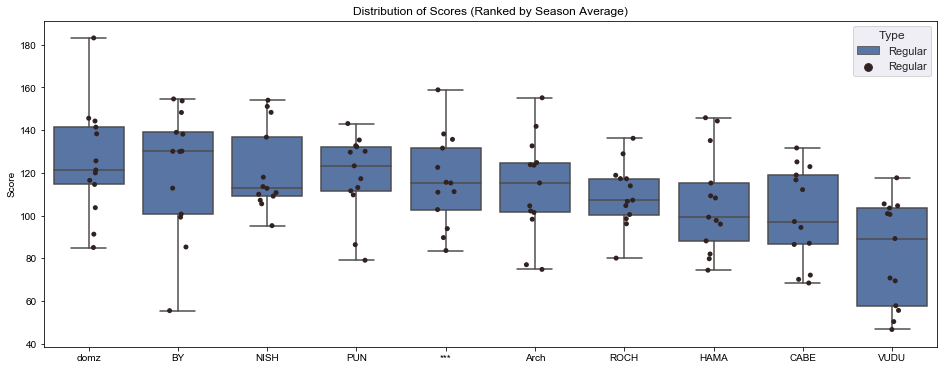

In [7]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

order = df.loc[df['Type']=='Regular'].groupby(by=["Abbrev"])["Score"].sum().sort_values().iloc[::-1].index

sns.set(style="darkgrid")
sns.boxplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, whis=2.0)
sns.stripplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, jitter=True, color="red", linewidth=0)
ax.set_xlabel('')
ax.set_title('Distribution of Scores (Ranked by Season Average)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:373: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)
No handles with labels found to put in legend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:373: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  ax.set_xlim(-.5, len(self.plot_data) - .5, auto=None)


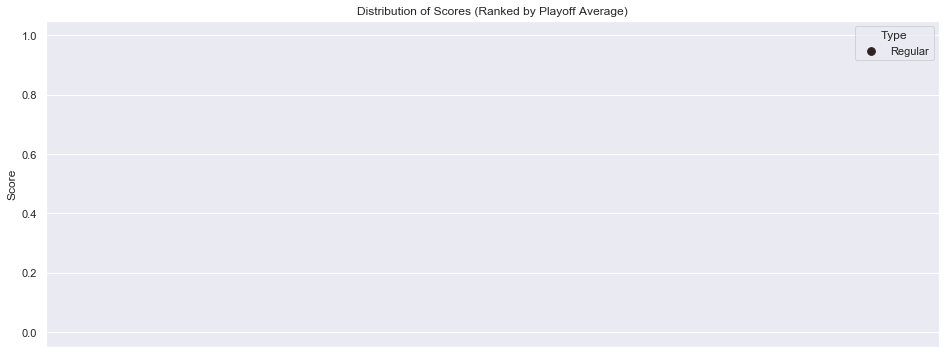

In [8]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

order = df.loc[df['Type']=='Playoff'].groupby(by=["Abbrev"])["Score"].sum().sort_values().iloc[::-1].index

sns.set(style="darkgrid")
sns.boxplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, whis=2.0)
sns.stripplot(x='Abbrev', y='Score', hue='Type', data=df, order=order, jitter=True, color="red", linewidth=0)
ax.set_xlabel('')
ax.set_title('Distribution of Scores (Ranked by Playoff Average)')
plt.show()

In [9]:
order = df.groupby(by=["Abbrev"])["Score"].sum().sort_values()
print(order)

Abbrev
VUDU    1072.98
CABE    1303.70
HAMA    1375.66
ROCH    1426.60
Arch    1475.64
***     1510.20
PUN     1543.90
NISH    1572.58
BY      1577.74
domz    1631.00
Name: Score, dtype: float64


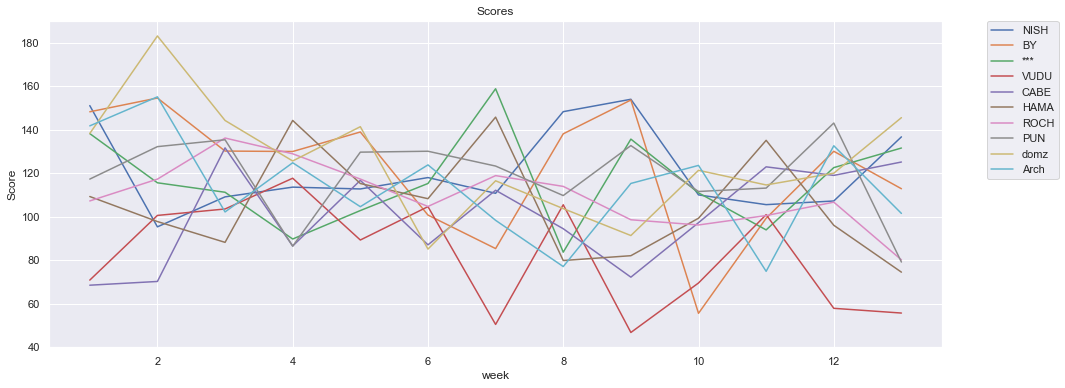

In [10]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
sns.lineplot(x='Week', y='Score', data= df, hue="Abbrev")
ax.set_xlabel('week')
ax.set_title('Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


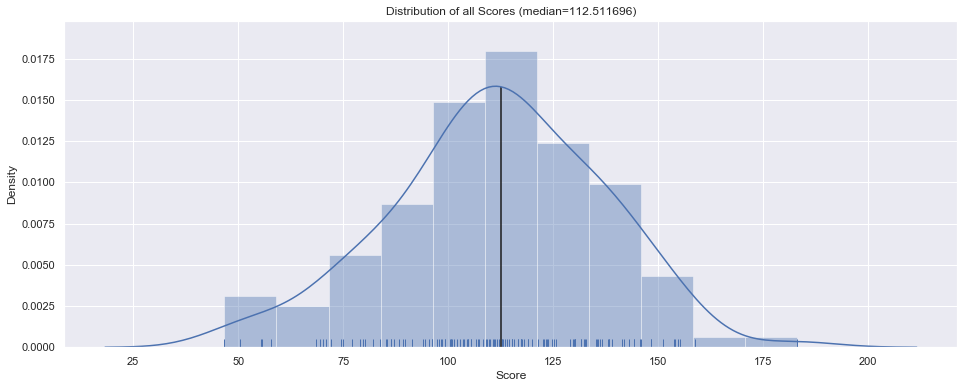

In [11]:
import scipy
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(16,6))
p=sns.distplot(df['Score'], rug=True);

x,y = p.get_lines()[0].get_data()
cdf = scipy.integrate.cumtrapz(y, x, initial=0)
nearest_05 = np.abs(cdf-0.5).argmin()
x_median = x[nearest_05]
y_median = y[nearest_05]

ax.set_title('Distribution of all Scores (median=%f)' % x_median)
plt.vlines(x_median, 0, y_median)

plt.show()